In [30]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [31]:
class AgentState(TypedDict):
    number1: int 
    operation1: str 
    number2: int
    finalNumber1: int
    number3: int 
    operation2: str 
    number4: int
    finalNumber2: int

In [32]:
def adder1(state:AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    state["finalNumber1"] = state["number1"] + state["number2"]

    return state

def subtractor1(state:AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""
    state["finalNumber1"] = state["number1"] - state["number2"]
    return state

def adder2(state:AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    state["finalNumber2"] = state["number3"] + state["number4"]

    return state

def subtractor2(state:AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""
    state["finalNumber2"] = state["number3"] - state["number4"]
    return state


def decide_next_node1(state:AgentState) -> AgentState:
    """This node will select the next node of the graph"""

    if state["operation1"] == "+":
        return "addition_operation"
    
    elif state["operation1"] == "-":
        return "subtraction_operation" 
        
def decide_next_node2(state:AgentState) -> AgentState:
    """This node will select the next node of the graph"""

    if state["operation2"] == "+":
        return "addition_operation"
    
    elif state["operation2"] == "-":
        return "subtraction_operation" 
        



In [33]:
graph = StateGraph(AgentState)

graph.add_node("add_node1", adder1)
graph.add_node("subtract_node1", subtractor1)
graph.add_node("router1", lambda state:state) # passthrough function

graph.add_node("add_node2", adder2)
graph.add_node("subtract_node2", subtractor2)
graph.add_node("router2", lambda state:state) # passthrough function


graph.add_edge(START, "router1") 

graph.add_conditional_edges(
    "router1",
    decide_next_node1, 

    {
        # Edge: Node
        "addition_operation": "add_node1",
        "subtraction_operation": "subtract_node1"
    }

)

graph.add_conditional_edges(
    "router2",
    decide_next_node2, 

    {
        # Edge: Node
        "addition_operation": "add_node2",
        "subtraction_operation": "subtract_node2"
    }

)

graph.add_edge("add_node1", "router2")
graph.add_edge("subtract_node1", "router2")

graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app = graph.compile()

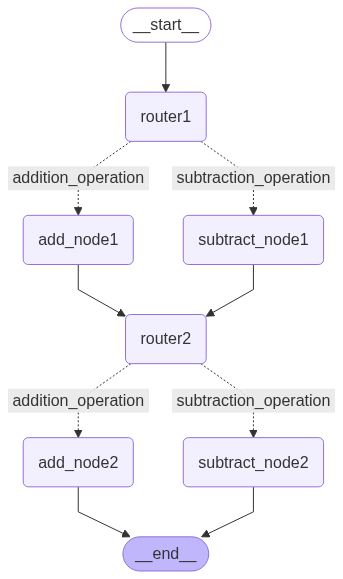

In [34]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [35]:
initial_state_1 = AgentState(number1 = 10, operation1="+", number2 = 5, number3 = 15, operation2="+", number4 = 3)
print(app.invoke(initial_state_1))

{'number1': 10, 'operation1': '+', 'number2': 5, 'finalNumber1': 15, 'number3': 15, 'operation2': '+', 'number4': 3, 'finalNumber2': 18}


In [36]:
# This way still works!

# result = app.invoke({"number1": 10, "operation1": "-", "number2": 5})
# print(result)